######################## BCB 546X: Python Assignment Details ########################

# ** Assignment: Complete Python code in a Jupyter Notebook ** #

First we load the necessary modules as Dr.X suggested and the ones we will need

In [31]:
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd
from Bio.Seq import Seq #For alternative translation function
from Bio.SeqUtils.ProtParam import ProteinAnalysis # For counting AA analysis function
import matplotlib.pyplot as plt # For plotting
import seaborn as sns # For color palettes
from matplotlib.cm import viridis #viridis palette
from mpl_toolkits.mplot3d import Axes3D #for bonus, I constructed a 3D plot.

#%%%%%%%%%%%%%%%#
### FUNCTIONS ###
#%%%%%%%%%%%%%%%#
## 1 ##
## Dr. X: this gets sequences 
## Please properly document this function in the Jupyter notebook 
## Your descriptions of all functions should contain information about what the function does,
## as well as information about the return types and arguments.


In [32]:
def get_sequences_from_file(fasta_fn): #defines a function that will get sequences from a fasta file for our work
    sequence_data_dict = {} # this will put the sequences in a dictionary format
    for record in SeqIO.parse(fasta_fn, "fasta"): # SeqI0.parse is used to iterate over all the records in fasta_fn
        description = record.description.split() 
        species_name = description[1] + " " + description[2] #species name extraction
        sequence_data_dict[species_name] = record.seq
    return(sequence_data_dict) #return the sequences from the file in a dictionary format

In [33]:
pengu_seq = get_sequences_from_file("penguins_cytb.fasta") # we use the get_sequences_from_file function
pengu_seq

{'Aptenodytes forsteri': Seq('ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC...TAA'),
 'Aptenodytes patagonicus': Seq('ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCC...TAA'),
 'Eudyptes chrysocome': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'),
 'Eudyptes chrysolophus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'),
 'Eudyptes sclateri': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'),
 'Eudyptula minor': Seq('ATGGCCCCCAACCTCCGAAAATCTCACCCCCTCCTAAAAATAATCAACAACTCT...TAA'),
 'Pygoscelis adeliae': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATTAACAACTCC...TAA'),
 'Pygoscelis antarctica': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATCAACAACTCC...TAG'),
 'Pygoscelis papua': Seq('ATGGCCCCCAACCTTCGAAAATCCCACCCTCTCCTAAAAATAATCAACAAATCC...TAG'),
 'Spheniscus demersus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAACTCC...TAA'),
 'Spheniscus humboldti': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAAC

## 2 ##
####### STRING-TRANSLATE FUNCTION ########

In [34]:
def translate_function(string_nucleotides):
    # This is for taking a string of nucleotides
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]  # It will map codons to their corresponding amino acids based on the vertebrate mt genetic code.

    # Generate a list of codons from the input nucleotide sequence
    codons = [string_nucleotides[i:i+3] for i in range(0, len(string_nucleotides), 3)]  # It will loop through every 3rd position in string_nucleotides, so that it can return codons. Range starts from the beginning of the codon position.

    # First, we define aa_seq_string as empty
    aa_seq_string = []

    # Translate each codon into an amino acid using the translation table
    for codon in codons:
        aa = mito_table.forward_table.get(codon, "stop")  # As suggested by Dr.X, this will get the corresponding amino acid from the translation table. If the codon isn't found, it will be considered as stop.
        if aa == "stop":
            break  # Following stop codon, it will break off the translation.
        else:
            aa_seq_string.append(aa)  # Otherwise, it will keep appending.

    return (''.join(aa_seq_string)) #exiting function

translate_function('ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC') # Example running the translate_function




'MAPNLRKSHPLLKMINNS'

## 3 ##
####### Alternative Functions ########

In [35]:
def translate_alternative(string_nucleotides): # This function again takes a string of nucleotides, now named different
    aa = Seq.translate(string_nucleotides,table=2,to_stop=True) #We are using Biopython's Seq.translate to perform translation, table 2 is default table, and stop codon rule is used again.
    return aa #exiting function

In [36]:
translate_alternative('ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC') # same output with different alternative function

'MAPNLRKSHPLLKMINNS'

## 4 ##
####### Count AA Function ########

In [37]:
def compute_molecular_weight(aa_seq):
    analysed_seq = ProteinAnalysis(aa_seq) # Here, we create a ProteinAnalysis object using the amino acid sequence
    molecular_weight = analysed_seq.molecular_weight() # Using the ProteinAnalysis object, it is possible to 
    
    return molecular_weight #exiting this function


## 5 ##
#### GC Content Analysis Function #####

In [38]:
def calculate_gc_content(string_nucleotides): #takes the sequence for DNA
    gc_count = string_nucleotides.count('G') + string_nucleotides.count('C')  #Counts the number of GC content
    total_bases = len(string_nucleotides) # Counts the number of total bases
    gc_content = (gc_count / total_bases) * 100 #Gets the GC percentage
    return gc_content


###   MAIN   ###

In [39]:
#We get the following code from Dr.X, which will help us to create a dataframe.

cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") 

penguins_df = pd.read_csv("penguins_mass.csv") # Includes only data for body mass 
species_list = list(penguins_df.species)

## 6 ## 
#### Two new columns to the penguin DataFrame: (1) molecular weight and (2) GC content. ####
#### We set the value to 'NaN' to indicate that these cells are currently empty. ####


In [40]:
penguins_df['molecular_weight'] = float('NaN') #Initializing new column molecular weight with NaN values
penguins_df['GC_content'] = float('NaN') #Initializing new column GC_content with NaN values

print(penguins_df.head()) #We want to check if the output is right

                   species   mass  molecular_weight  GC_content
0     Aptenodytes forsteri  28.00               NaN         NaN
1  Aptenodytes patagonicus  13.40               NaN         NaN
2      Eudyptes chrysocome   2.80               NaN         NaN
3    Eudyptes chrysolophus   4.50               NaN         NaN
4        Eudyptes sclateri   4.25               NaN         NaN


## 7 ##
## Including the molecular weight and GC content in the dataframe, also translating the nucleotide sequences by our own function ##

In [41]:
# We initialize empty lists to store molecular weight and GC content
mw_list = []
gc_list = []

# As Dr.X already wrote,we loop through each sequence in cytb_seqs and process
for key, value in cytb_seqs.items():
    aa_seq = translate_alternative(value) # We use the alternative function in #3
    print(aa_seq) # to see if our function is working

    mw = compute_molecular_weight(aa_seq)  #Computing molecular weight with the compute_molecular_weight function from before
    
    # Calculate GC content of the DNA sequence
    gc = calculate_gc_content(value) #value is the nucleotide sequences.
    
    # Next we append molecular weight and GC content to respective lists
    mw_list.append(mw)
    gc_list.append(gc)

# Then we add the molecular weight and GC content to the penguins DataFrame
penguins_df['molecular_weight'] = mw_list
penguins_df['GC_content'] = gc_list

print(penguins_df.head()) # Displaying the updated DataFrame


MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAMHYTADTTLAFSSVAHTCRNVQYGWLIRNLHANGASFFFICIYLHIGRGFYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWTWGGFSVDNPTLTRFFALHFLLPFMIAGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDILGFALMLLPLTTLALFSPNLLGDPENFTPANPLVTPPHIKPEWYFLFAYAILRSIPNKLGGVLALAASVLILFLIPLLHKSKQRTMAFRPLSQLLFWALVANLIILTWVGSQPVEHPFIIIGQLASLTYFTTLLILFPIAGALENKMLNH
MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAMHYTADTTLAFSSVAHTCRNVQYGWLIRNLHANGASFFFICIYLHIGRGFYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWAWGGFSVDNPTLTRFFALHFLLPFMIAGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDTLGFALMLLPLTTLALFSPNLLGDPENFTPANPLVTPPHIKPEWYFLFAYAILRSIPNKLGGVLALAASVLILFLIPLLHKSKQRTMTFRPLSQLLFWTLVANLTILTWIGSQPVEHPFIIIGQLASLTYFTILLILFPLIGTLENKMLNH
MAPNLRKSHPLLKTINNSLIDLPTPSNISAWWNFGSLLGICLATQILTGLLLAAHYTADTTLAFSSVAHTCRNVQYGWLIRNLHANGASFFFICIYLHIGRGLYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWAWGGFSVDNPTLTRFFTLHFLLPFMIAGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDILGFILLLL

## 8 ##
## Plotting a bar-chart of the mass. ##

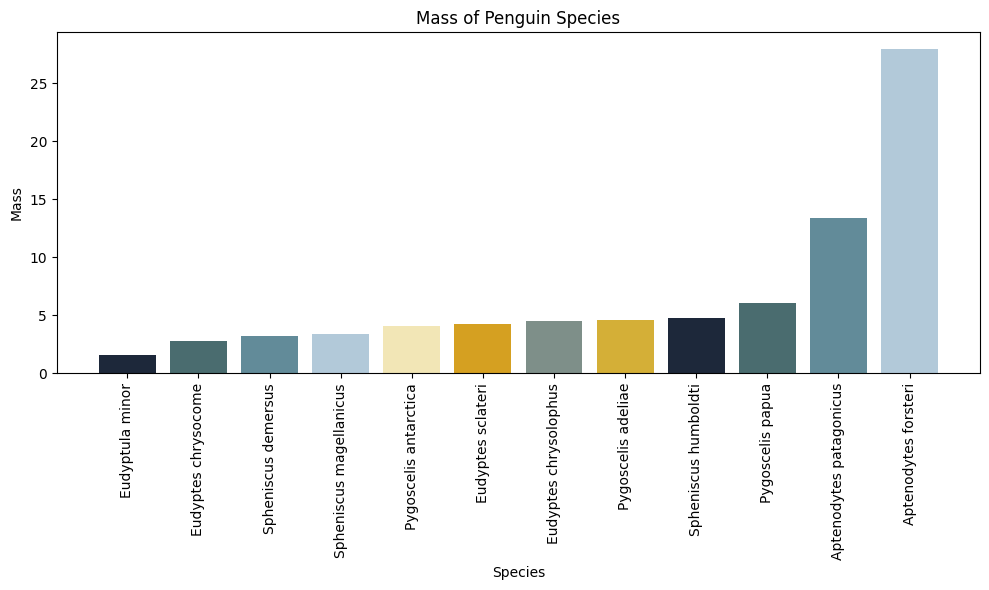

In [42]:
sorted_df = penguins_df.sort_values(by='mass') # sorting the DataFrame by mass in ascending order, so that it is easier to find the smallest penguin species

# We are going to go with Lord of the Rings color palette, because why not
lotr_palette = ["#1D283A", "#4A6C6F", "#628B99", "#B2C9D9", "#F2E6B6", "#D5A021", "#7E8F89", "#D4AF37"]

# Plotting the bar chart with the Lord of the Rings color palette
plt.figure(figsize=(10, 6))
plt.bar(sorted_df['species'], sorted_df['mass'], color=lotr_palette) # X axis will be labelled with species names
plt.xlabel('Species')
plt.ylabel('Mass')
plt.title('Mass of Penguin Species')
plt.xticks(rotation=90)  # X axis names 90 degree rotated, so that names don't overlap
plt.tight_layout()

# Show the plot
plt.show()


#### *Q1* What is the smallest penguin species? ####
#### *Q2* What else is interesting about this species? ####

 ### A1 : From the graph we can see that, the smalles species is Eudyptula minor. ###
 ### A2 : We can see most of the species are almost the same molecular masses. However, Aptenodytes forsteri is an outlier. It has multiple fold times more masses than the others. I googled about them.They are also called Emperor penguin. They are the largest of all penguins. They are endemic to Antarctica. ###

## 9 ##
### Plotting a visualization of the molecular weight in y-axis as a function of GC-content in the x-axis. ###

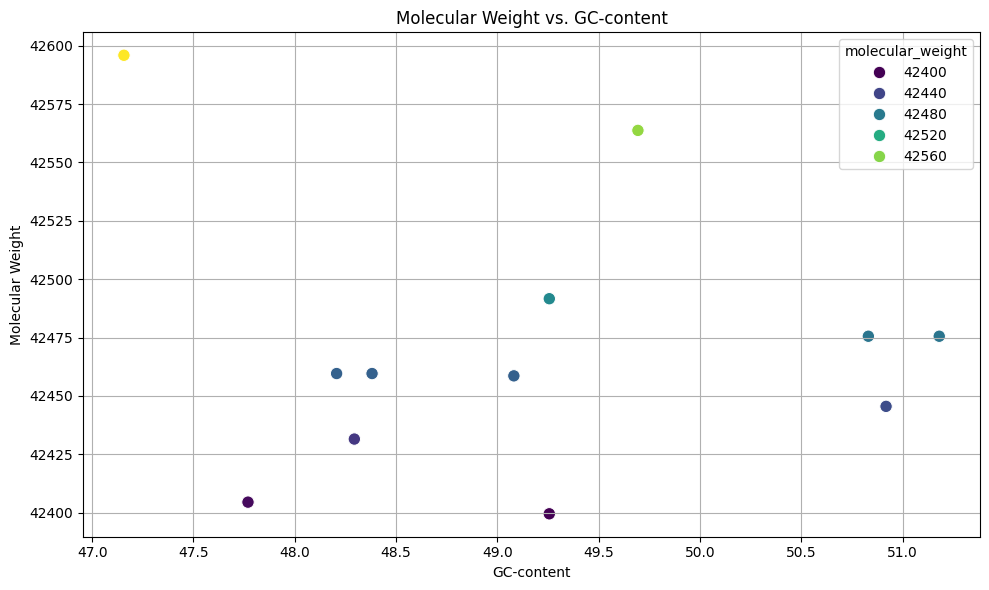

In [43]:
# Set the Seaborn style and color palette as viridis
sns.set_palette("viridis")  
# Plotting the visualization
plt.figure(figsize=(10, 6)) # Broad figure size
sns.scatterplot(data=penguins_df, x='GC_content', y='molecular_weight', hue='molecular_weight', palette='viridis', s=80) #hue indicates based on which value color pattern will change, viridis is our palette, and s=80 indicates larger circle.

plt.xlabel('GC-content')
plt.ylabel('Molecular Weight')
plt.title('Molecular Weight vs. GC-content')


plt.tight_layout() #Tight layout is necessary for subplot parameters to give specified padding.

plt.grid(True) # grid on the plot


plt.show() #Plot showing


### 10 ###
## We Save the new DataFrame to a file called "penguins_mass_cytb.csv"

In [44]:
penguins_df.to_csv("penguins_mass_cytb.csv") #saving as a .csv file.


## 11 - BONUS ##
#### Doing something else with the dataframe ####

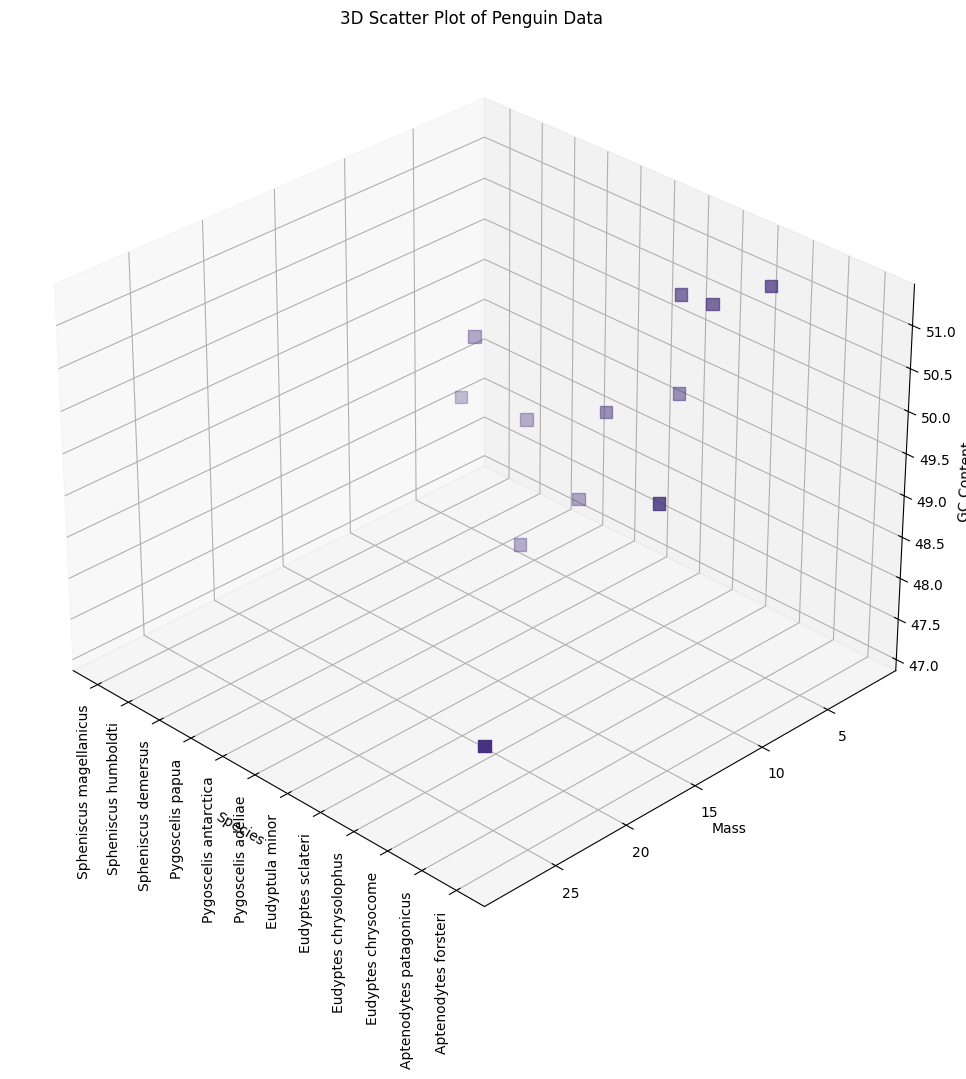

In [45]:
species = penguins_df['species']
mass = penguins_df['mass']
gc_content = penguins_df['GC_content']

species_indices = range(len(species)) # Assign numeric indices to species, since it was returing string error.

# Now we try to create a figure and a 3D axes
fig = plt.figure(figsize=(18, 12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(species_indices, mass, gc_content, c=sns.set_palette("viridis"), s=80, marker='s') # Plotting the 3D scatter plot

# Setting x-axis tick labels to species names
ax.set_xticks(species_indices)
ax.set_xticklabels(species, rotation=90) #I like to rotate the names here.

#Labels and Titles
ax.set_xlabel('Species')
ax.set_ylabel('Mass')
ax.set_zlabel('GC Content')
ax.set_title('3D Scatter Plot of Penguin Data')

ax.view_init(30, 135)# Rotating the plot for better visibility

# Show the plot
plt.show()
